# Demo

Contents:

1. Layer-wise Relevance Propagation (LRP)
1. Quantitative evaluation of LRP explanation using Region Perturbation (perturbation modes: inpainting, random)

## LRP

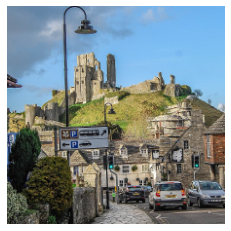

Finished 'relevance' in 0.3665 secs


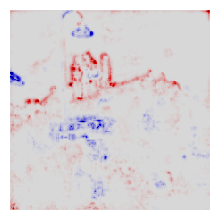

In [1]:
from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
from lrp import image, rules
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one('data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)

# Simulate batch by adding a new dimension so that X is in NCHW format
# N is the batch size
# C is the number of channels
# H is the height
# W is the width
X = torch.unsqueeze(X, 0)

# Hide plot axes
plt.axis('off')

# Plot input image
lrp.plot.plot_imagenet(X)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model=model,
                                                      target_types=target_types)

name_map: List[Tuple[List[str], rules.LrpRule,
                     Dict[str, Union[torch.Tensor, float]]]]

# LRP Composite from Montavon's lrp-tutorial
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

# Init LRP
lrp_instance: LRP = LRP(model)

# Prepare model layers for LRP
lrp_instance.convert_layers(name_map)

# Compute relevance attributions
R: torch.Tensor = lrp_instance.relevance(X)

# Display heatmap
lrp_instance.heatmap(R, width=2, height=2)

### LRP-modified Model

We will print the LRP-modified model to console. You will see that some layers were replaced with LRP layers.

In [7]:
lrp_instance.model

VGG(
  (features): Sequential(
    (0): LrpZBoxRule(
      (layer): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (low_layer): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (high_layer): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ReLU(inplace=True)
    (2): LrpGammaRule(
      (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (copy_layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): LrpGammaRule(
      (layer): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (copy_layer): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (6): ReLU(inplace=True)
    (7): LrpGammaRule(
      (layer): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (copy_layer): Conv

In [4]:
for layers, rule, params in name_map:
    for layer in layers:
        print(f'{layer} {rule.__name__}')

features.0 LrpZBoxRule
features.2 LrpGammaRule
features.5 LrpGammaRule
features.7 LrpGammaRule
features.10 LrpGammaRule
features.12 LrpGammaRule
features.14 LrpGammaRule
features.17 LrpEpsilonRule
features.19 LrpEpsilonRule
features.21 LrpEpsilonRule
features.24 LrpEpsilonRule
features.26 LrpEpsilonRule
features.28 LrpEpsilonRule
avgpool LrpZeroRule
classifier.0 LrpZeroRule
classifier.3 LrpZeroRule
classifier.6 LrpZeroRule


## Region Perturbation

### Perturbation Mode: Inpainting

Finished '_flip' in 0.1484 secs
Finished '_flip' in 0.1472 secs
Finished '_flip' in 0.1522 secs
Finished '_flip' in 0.1438 secs
Finished '_flip' in 0.1497 secs
Finished '_flip' in 0.1467 secs
Finished '_flip' in 0.1458 secs
Finished '_flip' in 0.1459 secs
Finished '_flip' in 0.1484 secs
Finished '_flip' in 0.1466 secs
Finished '_flip' in 0.1497 secs
Finished '_flip' in 0.1480 secs
Finished '_flip' in 0.1567 secs
Finished '_flip' in 0.1495 secs
Finished '_flip' in 0.1634 secs
Finished '_flip' in 0.1512 secs
Finished '_flip' in 0.1591 secs
Finished '_flip' in 0.1599 secs
Finished '_flip' in 0.1823 secs
Finished '_flip' in 0.1586 secs
Finished '_flip' in 0.1641 secs
Finished '_flip' in 0.1632 secs
Finished '_flip' in 0.1638 secs
Finished '_flip' in 0.1597 secs
Finished '_flip' in 0.1707 secs
Finished '_flip' in 0.1638 secs
Finished '_flip' in 0.1622 secs
Finished '_flip' in 0.1456 secs
Finished '_flip' in 0.1413 secs
Finished '__call__' in 4.6409 secs
Finished 'calculate_auc_score' in 0.0

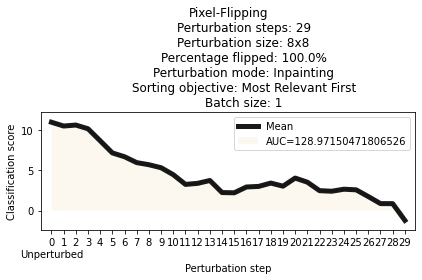

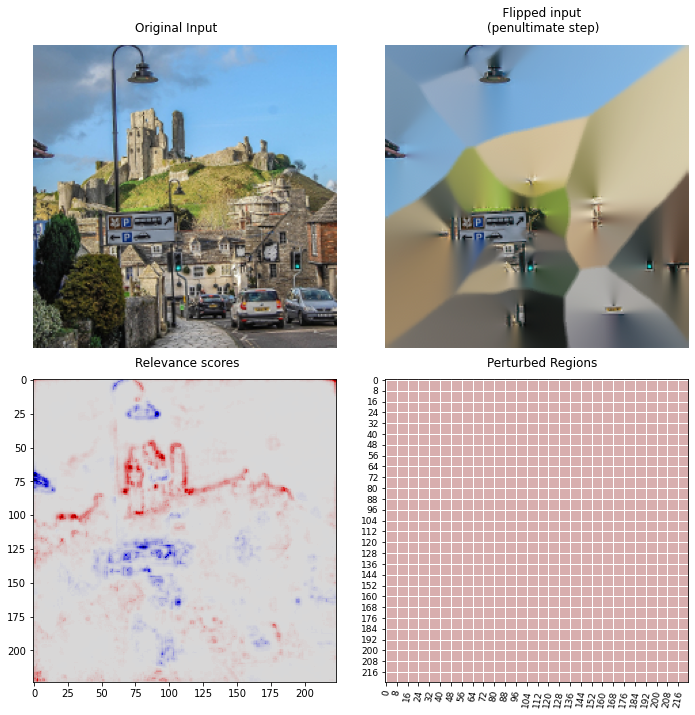

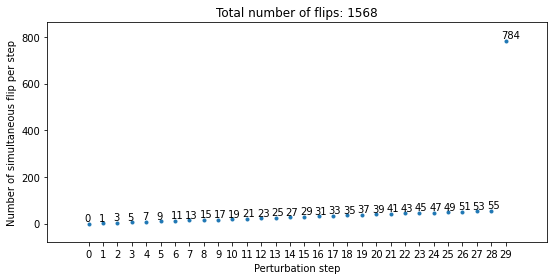

In [2]:
from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.INPAINTING)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

## Region Perturbation

### Perturbation Mode: Random

Finished '_flip' in 0.1467 secs
Finished '_flip' in 0.1456 secs
Finished '_flip' in 0.1490 secs
Finished '_flip' in 0.1450 secs
Finished '_flip' in 0.1412 secs
Finished '_flip' in 0.1461 secs
Finished '_flip' in 0.1546 secs
Finished '_flip' in 0.1498 secs
Finished '_flip' in 0.1574 secs
Finished '_flip' in 0.1496 secs
Finished '_flip' in 0.1500 secs
Finished '_flip' in 0.1493 secs
Finished '_flip' in 0.1495 secs
Finished '_flip' in 0.1498 secs
Finished '_flip' in 0.1532 secs
Finished '_flip' in 0.1555 secs
Finished '_flip' in 0.1532 secs
Finished '_flip' in 0.1482 secs
Finished '_flip' in 0.1496 secs
Finished '_flip' in 0.1445 secs
Finished '_flip' in 0.1489 secs
Finished '_flip' in 0.1449 secs
Finished '_flip' in 0.1468 secs
Finished '_flip' in 0.1438 secs
Finished '_flip' in 0.1496 secs
Finished '_flip' in 0.1476 secs
Finished '_flip' in 0.1479 secs
Finished '_flip' in 0.1450 secs
Finished '_flip' in 0.1442 secs
Finished '__call__' in 4.4601 secs
Finished 'calculate_auc_score' in 0.0

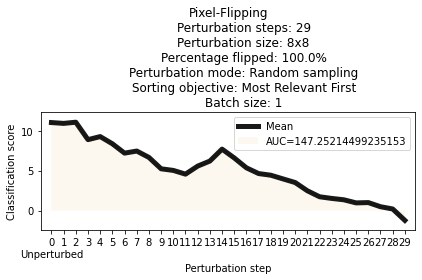

WARNING   Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


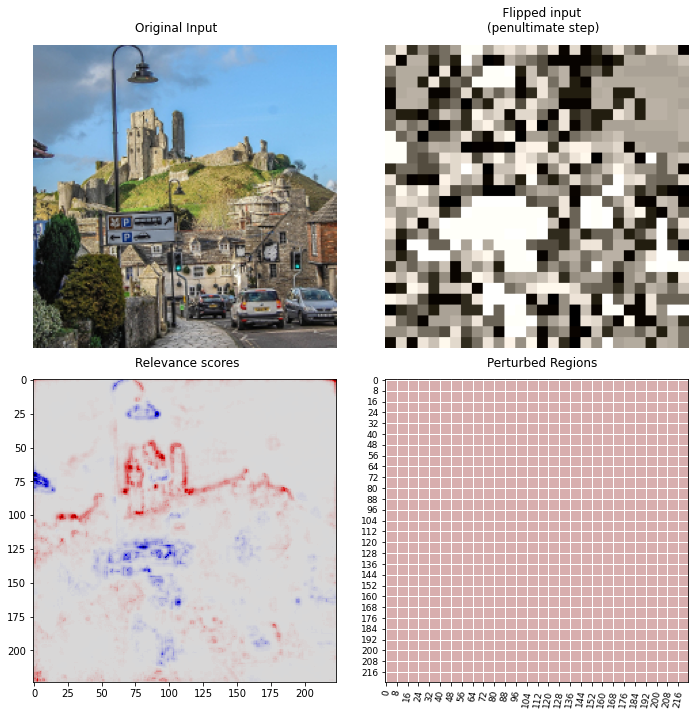

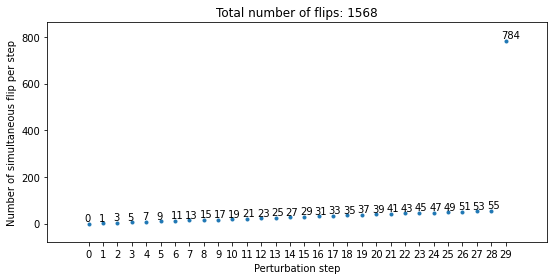

In [3]:
from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.RANDOM)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()